# Data understanding, motivation, model development, results, and conclusions



## Data understanding


The dataset is a direct copy of the Bank Transaction Dataset for Fraud Detection from Kaggle. The dataset was last updated on 04/11/2024.


This dataset provides a detailed look into transactional behavior and financial activity patterns, ideal for exploring fraud detection and anomaly identification. It contains 2,512 samples of transaction data, covering various transaction attributes, customer demographics, and usage patterns. Each entry offers comprehensive insights into transaction behavior, enabling analysis for financial security and fraud detection applications.

The dataset was synthesized based on realistic bank transaction patterns from publicly available sources, including research studies, industry reports, fraud detection surveys and other relevant studies.


The dataset is made up of individual transactions made from 2023-01-03 to 2024-01-02,


Link: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection




## Motivation

This is a practice of EDA and machine learning application on banking data.

At the end of the project, the goals include:
1. Performed well-coded EDA with valueable insights.
2. Developed a clustering model that properly segment transactions and accounts.
3. Codes are well-documented and pythonic.

## Model development process

A clustering model was developed using KNN method. The model utilized the sklearn library.

The variables included in the model are TransactionDurations and TransactionAmount. Both was directed through a standard scaler from the sklearn library before model fitting. By observing interia/k-number trade-off and the elbow method, k=3 was found to be the optimal number of neighbors and was used for the model.

## Result
The model was successful at producing a map with 3 clusters. The clusters could be described as below:
- Cluster 0: it includes transactions that are low in dollar amount and takes less time to transact.
- Cluster 1: Despite higher transaction duration, the members of this cluster deals mostly in small dollar amounts.
- Cluster 2: Members tend to take longer time to transact and deals in higher dollar amounts.

After calculating distance and threshold, the model detected 126 anomalies in the dataset with abnormally long durations and high transaction amounts.

## Conclusions and limitations
The model satisfied the purpose of the project, making interpretable detections of anomalies within the dataset.

There are rooms for improvement for future model development attempt. Here are a few ways to build up on this project's outcomes:
- Try different types of model to detect anomalies. This includes DBSCAN, Hierarchical Clustering, Spectral Clustering, and more.
- Adding more features to the model. (This will, however, increase model complexity and trade off interpretability)
- Perform further data manipulation to engineer new features.
- Fit the model on more data.

For future projects, one of more options will be employed to seek better performance.

# Importing libraries and data

In [1]:
# Import libraries

# General data analytics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime handlers
import datetime as dt
import calendar

# Map visualization
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly.express as px
from tqdm import tqdm


# Machine learning
# Pre-processing + transformers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Model training
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


#import libraries for model evaluation
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
## import metrics for clustering task
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import mutual_info_score

# Model optimization
from sklearn.ensemble import GradientBoostingRegressor


#Ad hoc

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393), (1.0, 0.7058823529411765, 0.5098039215686274), (0.5529411764705883, 0.8980392156862745, 0.6313725490196078), (1.0, 0.6235294117647059, 0.6078431372549019), (0.8156862745098039, 0.7333333333333333, 1.0), (0.8705882352941177, 0.7333333333333333, 0.6078431372549019), (0.9803921568627451, 0.6901960784313725, 0.8941176470588236), (0.8117647058823529, 0.8117647058823529, 0.8117647058823529), (1.0, 0.996078431372549, 0.6392156862745098), (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]


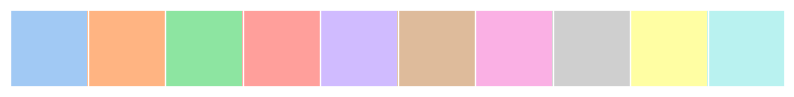

In [3]:
# Presentation-related
pd.set_option('display.max_columns', None)
sns.set_theme(rc={'figure.figsize': (12, 5)})

# Color palette
palette = sns.color_palette('pastel',10) # Default color palette
print(palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(palette) # Plotting your palette!
sns.color_palette("pastel", as_cmap=True) # Get a CMap
sns.set_palette('pastel',n_colors=10)

Comment: Even though it is possible to pull data directly from Kaggle, I chose to download it to my drive. This is to avoid potential updates or changes to the online file, making the analysis no longer valid.

In [4]:
# Loading data
df = pd.read_csv('/content/drive/MyDrive/Github/3 Bank transaction analysis and fraud detection/bank_transactions_data_2.csv')
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [5]:
# Inspecting data type
print(df.shape)
print(df.dtypes)

(2512, 16)
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [6]:
# Randomly inspecting data examples (inspected AC00460, AC00480, AC00439, AC00356, AC00092)
df1 = df[df['AccountID']== 'AC00092']
df1

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
119,TX000120,AC00092,115.83,2023-05-22 17:09:52,Debit,Fresno,D000663,124.6.134.78,M086,Branch,39,Engineer,167,1,6481.04,2024-11-04 08:10:02
365,TX000366,AC00092,632.69,2023-09-12 16:28:38,Debit,Denver,D000455,211.97.88.141,M047,ATM,80,Retired,76,1,4363.74,2024-11-04 08:09:26
516,TX000517,AC00092,64.90,2023-02-14 16:23:39,Credit,Detroit,D000165,45.246.89.225,M043,Branch,51,Retired,72,1,6854.61,2024-11-04 08:10:18
667,TX000668,AC00092,373.27,2023-07-18 18:03:03,Credit,Miami,D000090,35.67.21.23,M053,Online,61,Doctor,79,1,8441.61,2024-11-04 08:06:36
775,TX000776,AC00092,173.74,2023-09-08 17:48:22,Debit,Houston,D000127,161.177.41.214,M074,Online,80,Retired,64,1,4913.42,2024-11-04 08:11:52
845,TX000846,AC00092,793.13,2023-05-10 16:38:07,Debit,Memphis,D000518,173.232.121.213,M035,Online,68,Doctor,76,1,13389.16,2024-11-04 08:09:45
1034,TX001035,AC00092,98.03,2023-12-18 18:41:26,Debit,El Paso,D000697,49.20.211.229,M095,Branch,54,Engineer,165,1,6323.45,2024-11-04 08:08:36
1401,TX001402,AC00092,66.01,2023-10-06 18:39:39,Debit,Milwaukee,D000317,49.172.82.247,M042,Online,49,Engineer,179,1,3475.99,2024-11-04 08:07:05


Looking at data grouped by AccountID, there is some confusion at how the data was created. For the same account, there are vastly different CustomerAge registered while the transactions only spanned 2 years. CustomerOccupation seems to be varying unlogically as well. This goes back to how the data were synthesized. Based on features' description, it seems like data variance of a feature is usually based on one or two other features only. We will use such description as guide to properly extract patterns. It should be noted that this would unlikely be the case for a real-life dataset where logics are much more complicated and interconnected.

# Data cleaning

## 1. Missing data

In [7]:
# Checking for missing data
for colu in df.columns:
  print('{} is missing: '.format(colu),df[colu].isna().sum(),' entries')

TransactionID is missing:  0  entries
AccountID is missing:  0  entries
TransactionAmount is missing:  0  entries
TransactionDate is missing:  0  entries
TransactionType is missing:  0  entries
Location is missing:  0  entries
DeviceID is missing:  0  entries
IP Address is missing:  0  entries
MerchantID is missing:  0  entries
Channel is missing:  0  entries
CustomerAge is missing:  0  entries
CustomerOccupation is missing:  0  entries
TransactionDuration is missing:  0  entries
LoginAttempts is missing:  0  entries
AccountBalance is missing:  0  entries
PreviousTransactionDate is missing:  0  entries


## 2. Outliers

In [8]:
# Checking stats on the data
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## 3. Data type

In [9]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [10]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


Comment: While most variables seem to have been imported in the right data type, date data are being registered as 'object' (nominal) type. I will convert them to date type to reflect their meaning and prepare for later EDA.

In [11]:
# Correcting datetime data
targets = ['TransactionDate','PreviousTransactionDate']

for target in targets:
  df[target] = pd.to_datetime(df[target],format='%Y-%m-%d %H:%M:%S')

df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,datetime64[ns]
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


To simplify analysis, timezone difference is assumed to have been resolved when the data was synthesized. In reality, the US is divivded into 9 different time zones. In next projects, one where cleaning data is the focus, I will demonstrate how to resolve this.

In [12]:
# Inspecting some nominal data suspected to be categorical
targets = ['TransactionType','Location','Channel','CustomerOccupation']

for target in targets:
  print(target)
  print(df[target].unique())
  print('')

TransactionType
['Debit' 'Credit']

Location
['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']

Channel
['ATM' 'Online' 'Branch']

CustomerOccupation
['Doctor' 'Student' 'Retired' 'Engineer']



Except for locations, the others seem to be great fits for categorical data type due to their low number of unique values. Doing so would reduce memory usage when playing with the dataset and improve processing time.

In [13]:
# Converting to categorical, preserving intended order while reducing memmory usage
print('memory usage BEFORE conversion (in bytes)')
print(df.memory_usage().sum())

targets = ['TransactionType','Channel','CustomerOccupation']

for target in targets:
  df[target] = df[target].astype('category')


print('memmory usage AFTER conversion (in bytes)')
print(df.memory_usage().sum())

print(df.dtypes)

memory usage BEFORE conversion (in bytes)
321668
memmory usage AFTER conversion (in bytes)
269376
TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                  category
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                          category
CustomerAge                         int64
CustomerOccupation               category
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


# Exploratory Data Analysis (EDA)

## 1. Univariate analysis

### Unique value counts of ID variables

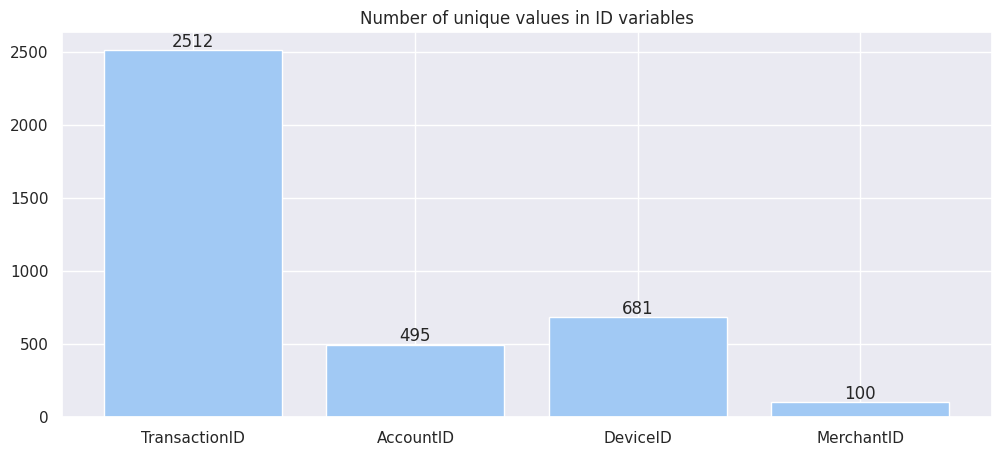

In [14]:
# Visualizing ID data counts
id_vars = ['TransactionID','AccountID','DeviceID','MerchantID']

uniques = []

for var in id_vars:
  unique = len(df[var].unique())
  uniques.append(unique)

plot = plt.bar(id_vars, uniques)
plt.title('Number of unique values in ID variables')
plt.bar_label(plot)

plt.show()

TransactionID, being the smallest unit in the dataset, has all unique values as expected. Interestingly, there are only 495 unique accounts included in the datasets and they use only 100 unique merchants. This show some favourtism in terms of choosing merchants.

### Exploring temporal data - TransactionDate

In [15]:
# Distilling transaction date variable into a new dateframe
trans_dates = df['TransactionDate'].reset_index()
trans_dates['date'] = trans_dates['TransactionDate'].dt.date
trans_dates['time'] = trans_dates['TransactionDate'].dt.time
trans_dates['weekday']  = trans_dates['TransactionDate'].dt.strftime('%a')
trans_dates['weekday'] = trans_dates['weekday'].astype('category')
trans_dates['weekday'] = trans_dates['weekday'].cat.reorder_categories(new_categories=['Mon','Tue','Wed','Thu','Fri'],ordered=False)

trans_dates.head(10)

,index,TransactionDate,date,time,weekday
0,0,2023-04-11 16:29:14,2023-04-11,16:29:14,Tue
1,1,2023-06-27 16:44:19,2023-06-27,16:44:19,Tue
2,2,2023-07-10 18:16:08,2023-07-10,18:16:08,Mon
3,3,2023-05-05 16:32:11,2023-05-05,16:32:11,Fri
4,4,2023-10-16 17:51:24,2023-10-16,17:51:24,Mon
5,5,2023-04-03 17:15:01,2023-04-03,17:15:01,Mon
6,6,2023-02-15 16:36:48,2023-02-15,16:36:48,Wed
7,7,2023-05-08 17:47:59,2023-05-08,17:47:59,Mon
8,8,2023-03-21 16:59:46,2023-03-21,16:59:46,Tue
9,9,2023-03-31 16:06:57,2023-03-31,16:06:57,Fri


In [16]:
# Check for simultaneous transactions --> found none
print(trans_dates[trans_dates.duplicated(subset=['TransactionDate']) == True])

Empty DataFrame
Columns: [index, TransactionDate, date, time, weekday]
Index: []


#### Distribution of daily transaction volumes

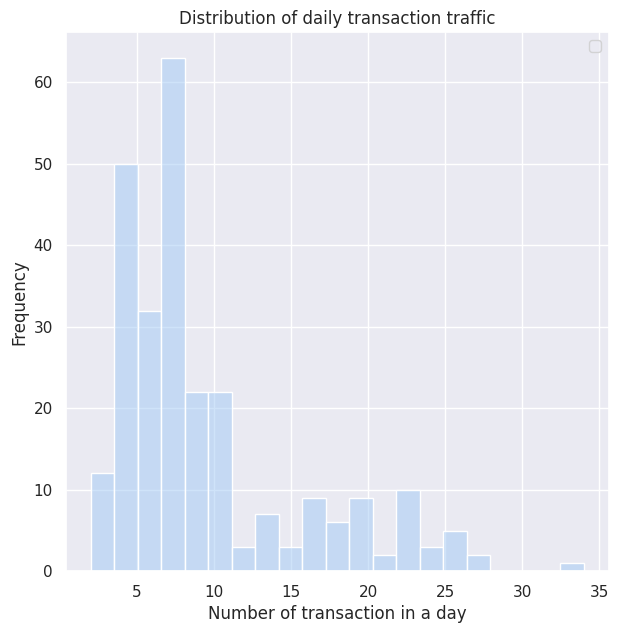

In [17]:
# Visualizing frequencies
## by date
date = trans_dates['date'].value_counts().reset_index()

plt.figure(figsize=(7, 7))
sns.histplot(data=date)
plt.xlabel('Number of transaction in a day')
plt.ylabel('Frequency')
plt.title('Distribution of daily transaction traffic')
plt.legend([])
plt.show()

The majority of days see traffic volume at round 5-10 transactions. There are some days that this number can spike up to naerly 35 transaction per days, suggesting some unusual activities that might need further investigation.

#### Distribution of transaction volume by weekday

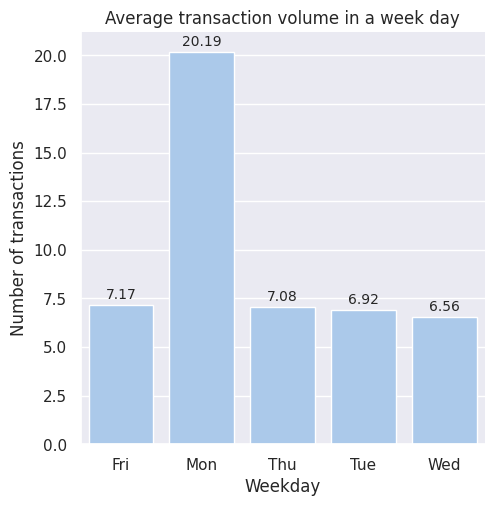

In [18]:
# by weekday
date['date'] = pd.to_datetime(date['date'],format='%Y%m%d')
date['weekday'] = date['date'].dt.strftime('%a')

weekdays_avg = date.groupby('weekday').agg({'count':'mean'}).reset_index()

plot = sns.catplot(data=weekdays_avg,x='weekday',y='count',kind='bar')

### Adding data labels with plot.ax
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # x coordinate of text
        h + 0.5, # y coordinate of text
        '{}'.format(round(h,2)),
        ha='center',
        va='center',
        size=10)

plt.title('Average transaction volume in a week day')
plt.xlabel('Weekday')
plt.ylabel('Number of transactions')

plt.show()

When grouping by weekdays, it can clearly be seen that Monday is the most busy day for the bank as its transaction traffice spike from around 7 transactions in every other day to an average of 20.19 transactions in this day.

### Distribution of some categorical data - TransactionType, Channel, and CustomerOccupation

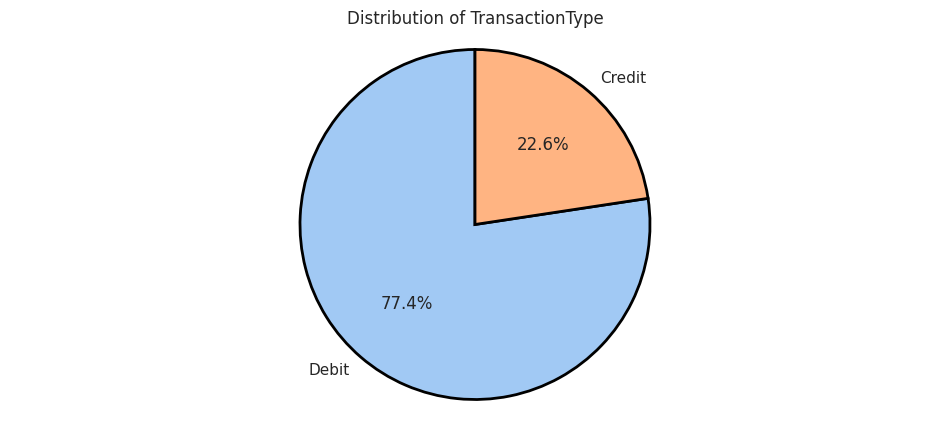

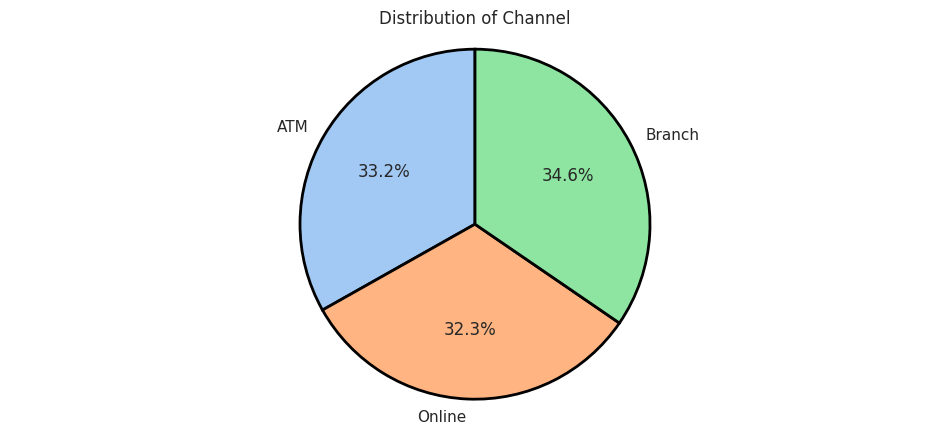

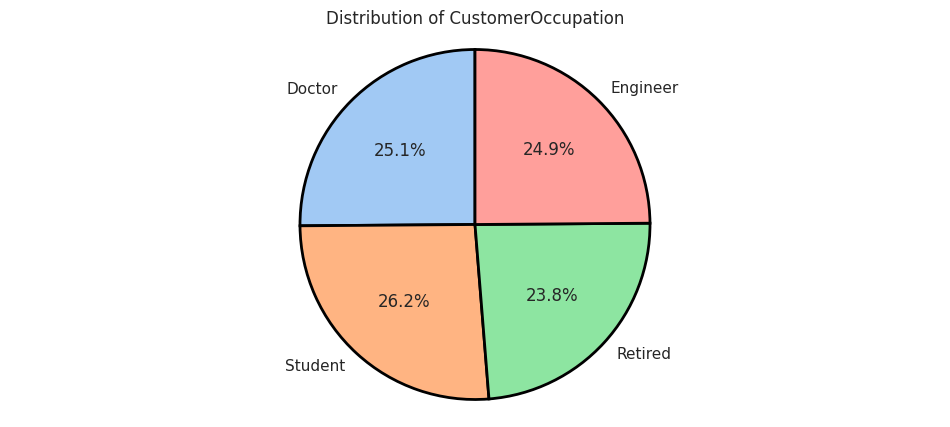

In [19]:
# Visualzing categorical data proportions with pie chart
values = []

for col in df.select_dtypes(include=['category']).columns:
  # Get unique labels
  labels = df[col].unique()
  # Count occurrences for each label
  for label in labels:
    count = df[df[col] == label][col].count()
    values.append(int(count))
  # Create pie chart
  plt.pie(values, labels=labels,
                      autopct='%1.1f%%',
                      startangle=90,
                      wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
  plt.title('Distribution of {}'.format(col))
  plt.axis('equal')  # Equal aspect ratio makes it a circle
  plt.show()
  values = []

There is a imbalance in distribution between Debit and Credit transaction type in the dataset. This might suggest a pattern on how people are using the bank services.
Besides that, there is a good balance in choice of transactional channel and occupation of customers.

### How many times do people usually attempt to login before transactions?

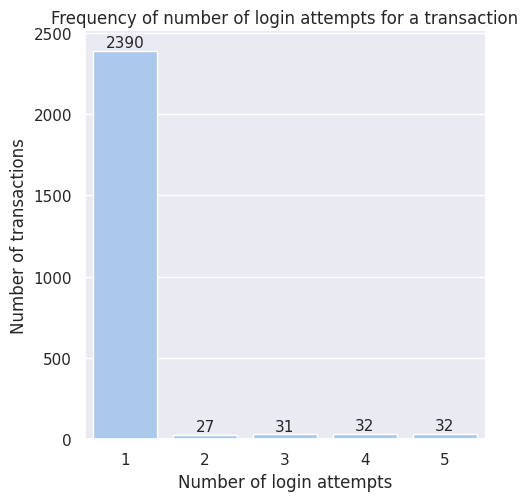

In [20]:
## Seeing LogicAttempts' values frequency
logins = df['LoginAttempts'].value_counts().reset_index()

plot = sns.catplot(x='LoginAttempts', y='count', kind='bar', data=logins)

### Adding data labels with plot.ax
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # x coordinate of text
        h + 50, # y coordinate of text
        '{}'.format(int(h)),
        ha='center',
        va='center',
        size=11)

plt.xlabel('Number of login attempts')
plt.ylabel('Number of transactions')
plt.title('Frequency of number of login attempts for a transaction')
plt.show()

It is not surprising to see that most people only require 1 login attempt before making it to transactions. Taking multiple attempts at logging in woulc indicate breach of account security and could be a good indicator of fraud.

### Distribution of monetary variables - TransactionAmount and AccountBalance

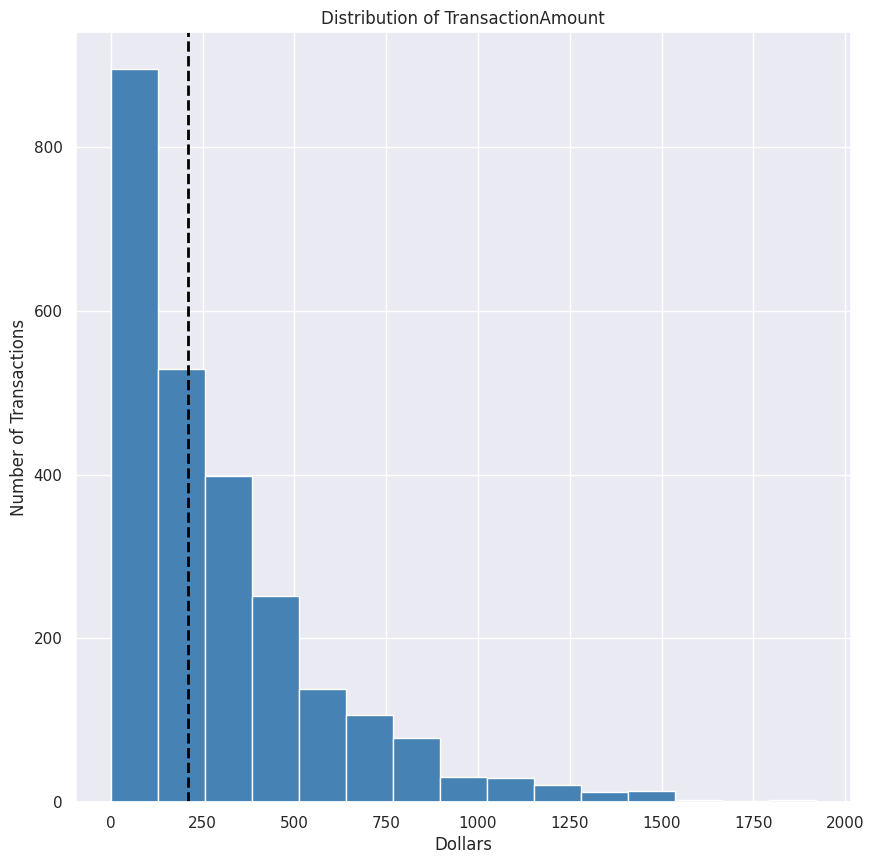

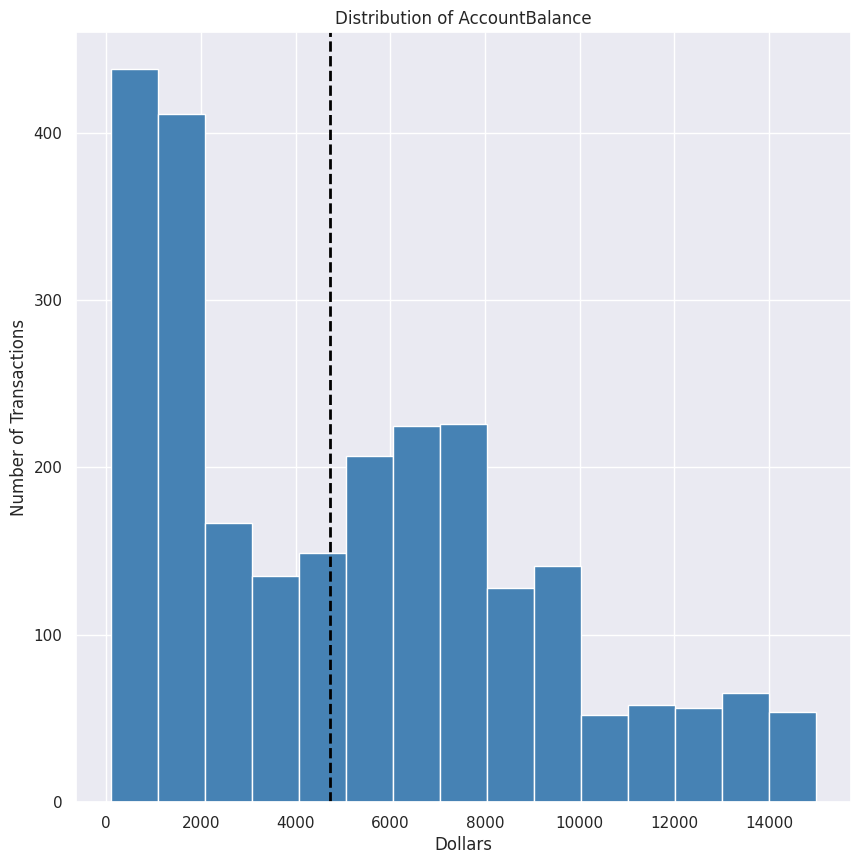

In [21]:
# Transaction Amount
moneys = ['TransactionAmount','AccountBalance']

for target in moneys:
  median = np.quantile(df[target],0.5)

  plt.figure(figsize=(10, 10))
  plt.hist(df[target], color='steelblue', ec='black', bins=15)
  plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label='Mean')
  plt.title('Distribution of {}'.format(target))
  plt.xlabel('Dollars')
  plt.ylabel('Number of Transactions')
  plt.show()

From distribution of transactional amount, it could be seen that most transaction with the bank stay in the low range with 50% staying below 250 dollars. However, the upper 50% can span upto around 2000 dollar per transaction. Speculation is that there are differences in purpose for the small value transactions and big value ones. Their behaviours might be different and could prompt further analysis with this split.

Regarding AccountBalance, the amount of money people left in their bank account after the transaction, the data distribution is less extreme. Though there is a spike in cases where less than 2000 dollar were left, the data show that this variable see values spread out its entire range. Further analysis can be done to see ratio between transaction amount and account balance and categorize transactions.

### Transaction volume by locations

#### Ranking of location by transaction volume

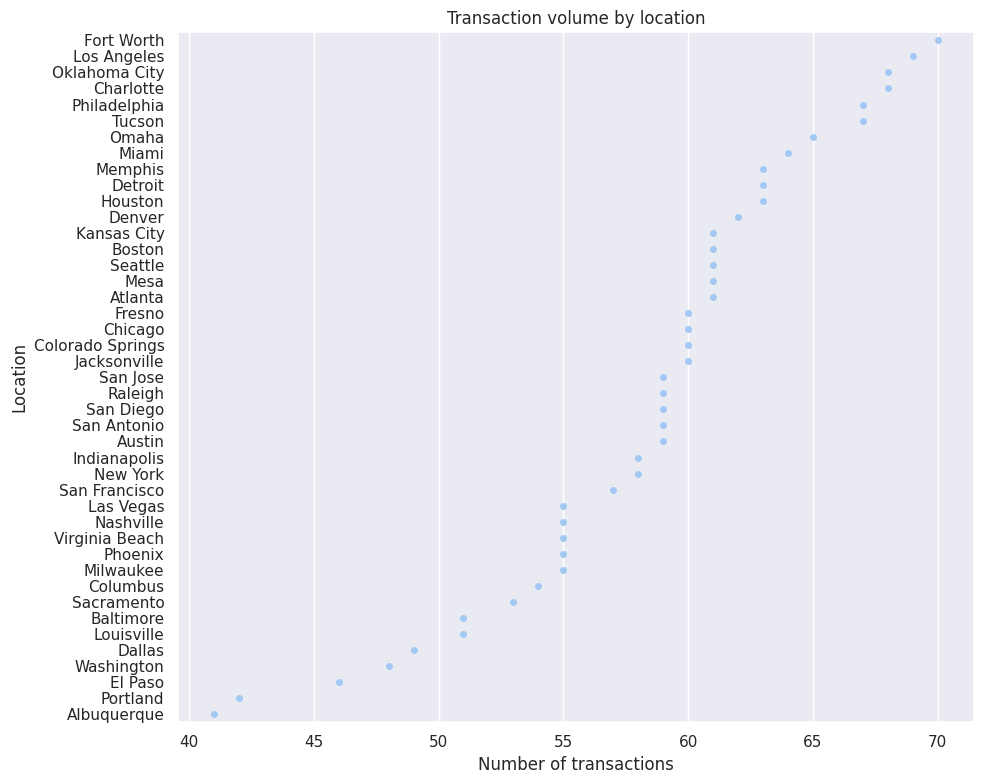

In [22]:
# Ranking of location by transaction volumes
loca = df['Location'].value_counts().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 8))  # width=10 inches, height=8 inches

sns.stripplot(data=loca, y='Location', x='count', jitter=True)
plt.xlabel('Number of transactions')
plt.ylabel('Location')
plt.title('Transaction volume by location')
plt.tight_layout()
plt.show()

There is not much differences in transaction volume contribution between locations in the dataset with the lowest being Albuquerque with around 40 transactions and the highest being Fort Worth at just 70.

#### Transaction volume on a (interactive) map

In [23]:
# Visualizing transactive frequency by location onto map
## Extracting frequency for each location/city
city_counts = df['Location'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

## Geocoding city names
geolocator = Nominatim(user_agent="city_mapper", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

## Adding latitude and longitude columns
tqdm.pandas()
city_counts['location'] = city_counts['city'].progress_apply(geocode)
city_counts['lat'] = city_counts['location'].apply(lambda loc: loc.latitude if loc else None)
city_counts['lon'] = city_counts['location'].apply(lambda loc: loc.longitude if loc else None)

## Removing failed lookups
city_counts = city_counts.dropna(subset=['lat', 'lon'])

## PLotting map visualization
fig = px.scatter_geo(
    city_counts,
    lat='lat',
    lon='lon',
    size='count',
    color='count',
    hover_name='city',
    scope='usa',
    title='Transaction frequency by location/city',
    color_continuous_scale='Reds'
)
fig.show()

100%|██████████| 43/43 [00:42<00:00,  1.00it/s]


Projecting transaction onto a map show a lack of representation of certain city and areas on the US where no transactions were reported. Depending on the bank operation and services, existence of transactions in these areas might indicate frauds or errors in the system.

### How frequently does each IP address get used?

In [24]:
# Number of unique IP addresses in the dataset
print('Number of unique IP addresses is {}'.format(len(df['IP Address'].unique())))

Number of unique IP addresses is 592


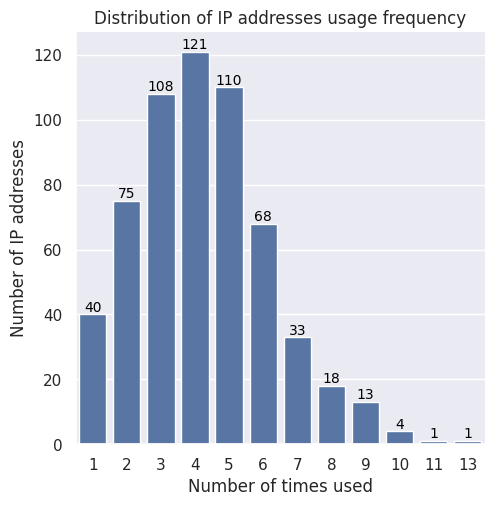

In [25]:
# Visualizing how frequently each IP address was used
IP = df['IP Address'].value_counts().sort_values(ascending=False).reset_index()
IP['freq'] = IP['count']
hist_IP_count = IP['freq'].value_counts().reset_index()
hist_IP_count = hist_IP_count.sort_values(by=['freq'])

sns.set_theme(rc={'figure.figsize': (12, 5)})
g = sns.catplot(data=hist_IP_count,x='freq',y='count',kind='bar')
# Get the axes object from the catplot
ax = g.facet_axis(0, 0)

# Add the data labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')
plt.xlabel('Number of times used')
plt.ylabel('Number of IP addresses')
plt.title('Distribution of IP addresses usage frequency')
plt.show()

Distribution of IP addresses in the dataset resemablance a normal distribution which peaks at 4 appearances. There are outliers where some IP addresses were seen to be used up to 11 or 13 times.

In [26]:
# inspecting transactions with most frequent IP addresses : 200.136.146.93
df[df['IP Address'] == '200.136.146.93'].sort_values(by='TransactionDate')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
962,TX000963,AC00124,55.86,2023-01-23 17:18:16,Debit,Seattle,D000211,200.136.146.93,M007,Online,39,Engineer,68,1,5346.46,2024-11-04 08:06:59
1671,TX001672,AC00335,27.25,2023-03-20 16:02:51,Credit,Kansas City,D000335,200.136.146.93,M082,Branch,63,Retired,92,1,5365.20,2024-11-04 08:09:28
1050,TX001051,AC00420,62.86,2023-05-08 16:24:00,Debit,Houston,D000271,200.136.146.93,M090,Branch,25,Student,31,1,1040.43,2024-11-04 08:10:33
387,TX000388,AC00135,39.66,2023-05-18 16:16:53,Debit,Virginia Beach,D000680,200.136.146.93,M045,Branch,52,Engineer,169,1,8497.34,2024-11-04 08:07:20
512,TX000513,AC00012,8.65,2023-06-05 17:08:37,Debit,Las Vegas,D000309,200.136.146.93,M037,Online,48,Doctor,273,1,10778.35,2024-11-04 08:09:03
1752,TX001753,AC00122,303.43,2023-06-06 17:32:57,Debit,Virginia Beach,D000166,200.136.146.93,M029,Branch,22,Student,30,1,1833.24,2024-11-04 08:08:11
754,TX000755,AC00153,84.34,2023-06-08 16:27:56,Debit,Memphis,D000493,200.136.146.93,M039,Online,58,Retired,248,3,5313.97,2024-11-04 08:09:31
485,TX000486,AC00400,188.99,2023-06-08 16:43:06,Debit,Oklahoma City,D000551,200.136.146.93,M065,Branch,58,Engineer,92,1,7315.34,2024-11-04 08:07:32
1014,TX001015,AC00011,688.36,2023-06-30 16:31:49,Credit,Memphis,D000235,200.136.146.93,M007,Branch,23,Student,22,1,5191.13,2024-11-04 08:11:05
500,TX000501,AC00433,120.90,2023-07-12 16:17:27,Debit,Tucson,D000195,200.136.146.93,M074,Branch,40,Doctor,52,1,9009.42,2024-11-04 08:08:19


### Distribution of transactions durations

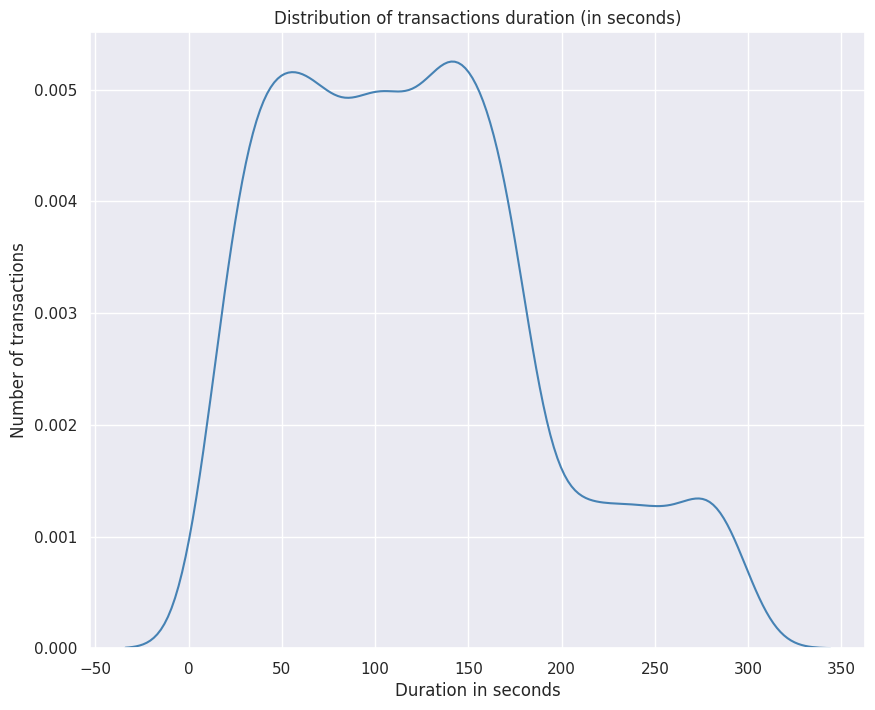

In [27]:
# Transaction durations in histogram
plt.figure(figsize=(10, 8))
sns.kdeplot(df['TransactionDuration'], color='steelblue') #since the data reach maximum at 300, each bin should cover a range of 30
plt.xlabel('Duration in seconds')
plt.ylabel('Number of transactions')
plt.title('Distribution of transactions duration (in seconds)')
plt.show()

A sudden drop in frequency is seen as transaction duration goes from 150 to 200. This variable level until around 270 and then dramatically drop again as it reaches more extreme values. Such behaviours could indicate possible groups of transactions with some significant differences or anomalies groups. This variable could be a valuable trace of anomalies and will be included as a feature in the anomalies detection model.

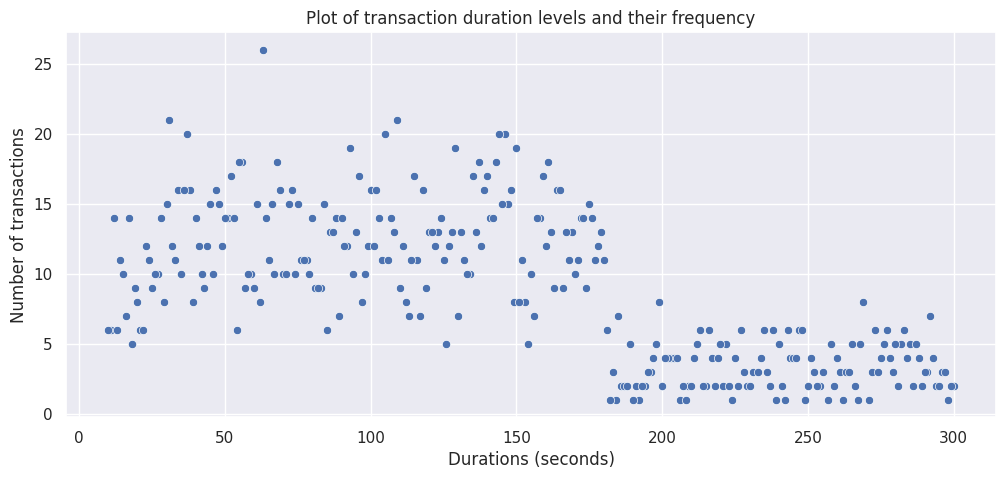

In [28]:
# Re-visualize for better grasp
durations = df['TransactionDuration'].value_counts().reset_index()
sns.scatterplot(data=durations, x='TransactionDuration',y='count')
plt.xlabel('Durations (seconds)')
plt.ylabel('Number of transactions')
plt.title('Plot of transaction duration levels and their frequency')
plt.show()

### Inspecting PreviousTransactionDate

In [29]:
check = df['PreviousTransactionDate'].sort_values()
print(check.head(10)) # printing 10 examples with earliest timestamps
print(check.tail(10)) # printing 10 examples with latest timestamps

469    2024-11-04 08:06:23
2044   2024-11-04 08:06:23
1252   2024-11-04 08:06:23
35     2024-11-04 08:06:23
2157   2024-11-04 08:06:23
2107   2024-11-04 08:06:23
2423   2024-11-04 08:06:23
1249   2024-11-04 08:06:23
1913   2024-11-04 08:06:24
2114   2024-11-04 08:06:24
Name: PreviousTransactionDate, dtype: datetime64[ns]
291    2024-11-04 08:12:22
1453   2024-11-04 08:12:22
1234   2024-11-04 08:12:22
1414   2024-11-04 08:12:22
331    2024-11-04 08:12:22
2510   2024-11-04 08:12:22
1368   2024-11-04 08:12:22
234    2024-11-04 08:12:22
2038   2024-11-04 08:12:23
1344   2024-11-04 08:12:23
Name: PreviousTransactionDate, dtype: datetime64[ns]


This variable is loosely defined by the author. The word-by-word definition is "Timestamp of the last transaction for the account, aiding in calculating transaction frequency." No interpretation explains that pattern seen in this variable which has a time range of just around 6 minutes.

For now, I will ignore this variable. Further follow-up should be done with the author or matter experts to explain this before continuing.

## Bivariate Analysis
Bivariate analysis will look through how 2 variables interact with one another. This will largely be guided by documentation of author on how variables are synthesized.

### Transactional activities by accounts

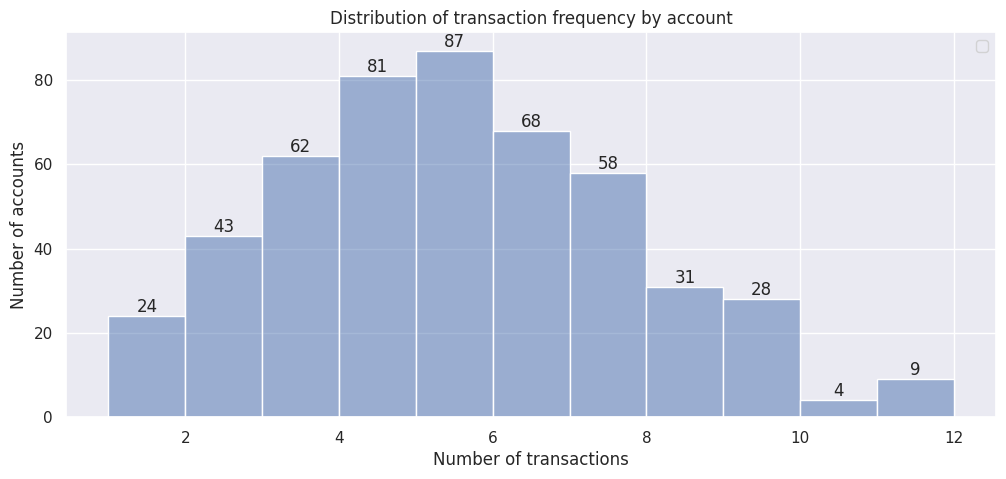

In [30]:
# Transactions per accounts
accounts_trans = df.groupby('AccountID').agg({'TransactionID':'count'}).sort_values(by='TransactionID',ascending=False)
accounts_trans = accounts_trans.rename(columns={'TransactionID': 'No_of_transactions'})

ax = sns.histplot(data=accounts_trans)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Number of transactions')
plt.ylabel('Number of accounts')
plt.legend([])
plt.title('Distribution of transaction frequency by account')
plt.show()

Looking at the frequency of transaction by accounts, a normal distribution can be obversed. Most accounts saw about 4-5 transactions for the entire period and the maximum number of transaction per account only reaches 12.

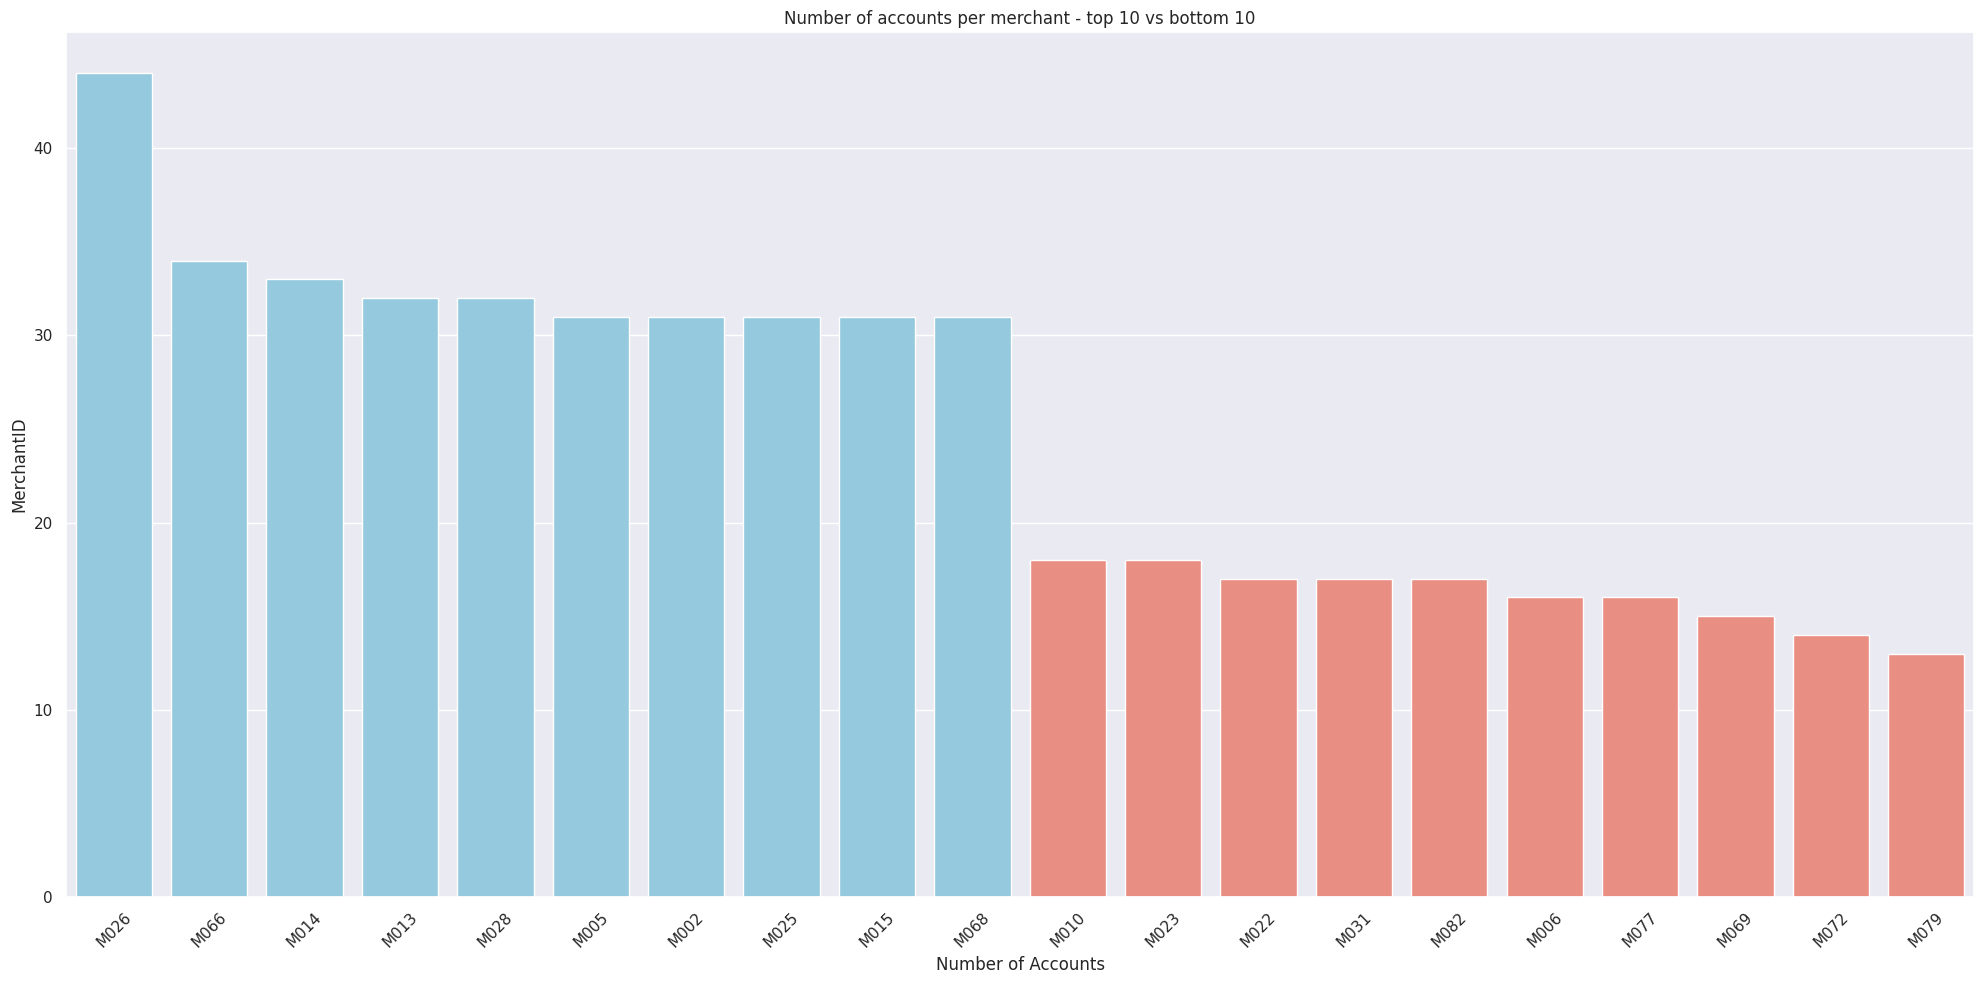

In [31]:
# Preferred merchants by account holders
mercs = df.groupby(['MerchantID']).agg({'AccountID':'nunique'}).reset_index()
mercs = mercs.sort_values(by='AccountID',ascending=False)
mercs_top_10 = mercs.head(10)
mercs_bot_10 = mercs.tail(10)
mercs_diff = pd.concat([mercs_top_10, mercs_bot_10])

plt.figure(figsize=(20, 10))

sns.barplot(data=mercs_top_10, x='MerchantID', y='AccountID', color= 'skyblue')
sns.barplot(data=mercs_bot_10, x='MerchantID', y='AccountID', color = 'salmon')
plt.xlabel('Number of Accounts')
plt.xticks(rotation=45)
plt.ylabel('MerchantID')
plt.title('Number of accounts per merchant - top 10 vs bottom 10')
plt.tight_layout()
plt.show()

As suspected from earlier, there is imbalance in coverage of each merchant. Whereas the top 10 merchants with have more than 30 accounts using them, the bottom 10 saw only less than 20.

### Effect of occupation group on numerical variables

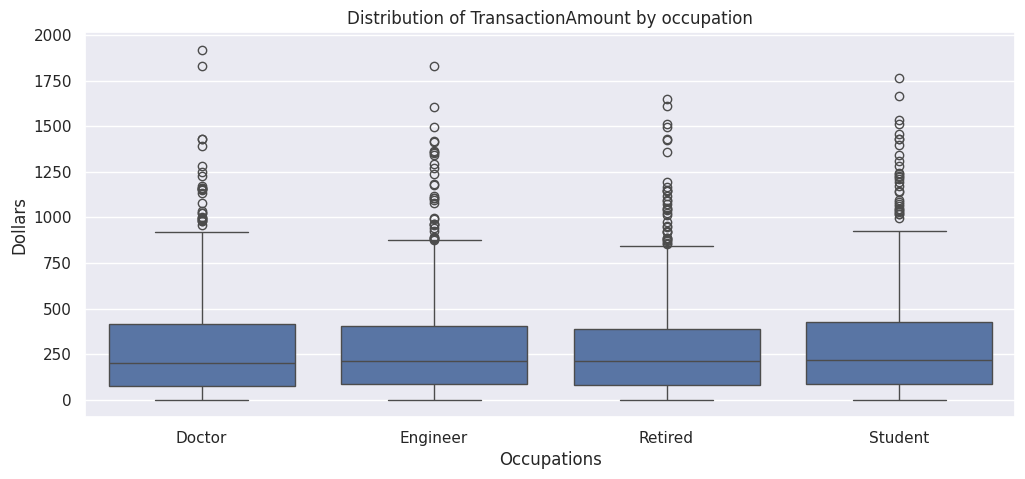

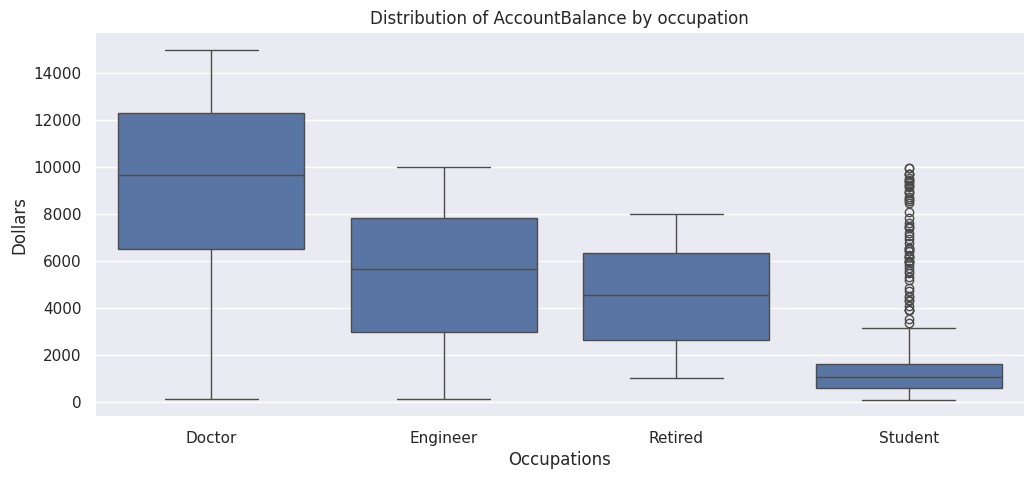

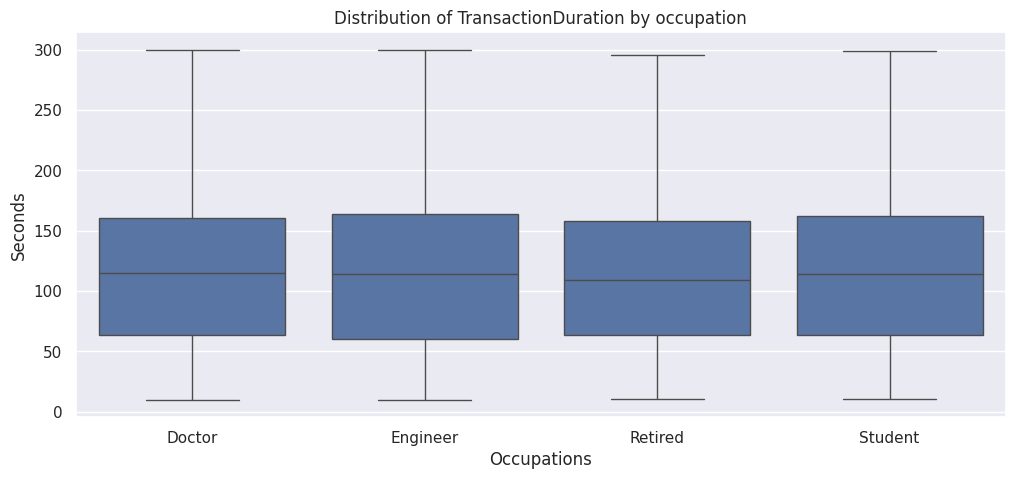

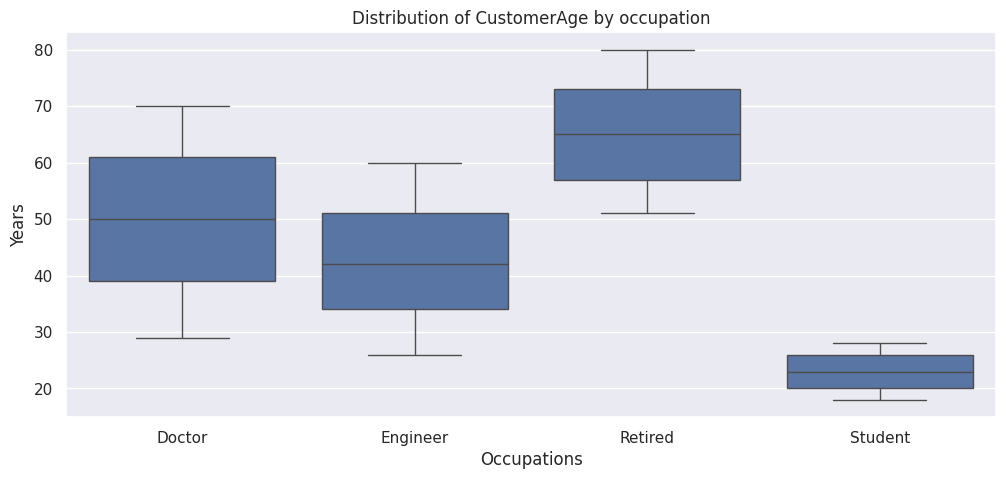

In [32]:
targets = ['TransactionAmount','AccountBalance','TransactionDuration','CustomerAge']
units = {'TransactionAmount':'Dollars',
          'AccountBalance':'Dollars',
          'TransactionDuration':'Seconds',
          'CustomerAge':'Years'}

for target in targets:
  # Customer age in different professions
  ax = sns.boxplot(data=df,x='CustomerOccupation',y=target)
  plt.xlabel('Occupations')
  plt.ylabel(units[target])
  plt.title('Distribution of {} by occupation'.format(target))
  plt.show()
  print('')
  print('')
  print('')

The effect of occupation is naturally best seen in terms of account balance level and age.

It seem like occupation is not indicative of how it take people to transact. Interestingly,  there is no clear difference in terms of transaction amount as well.

<Axes: xlabel='TransactionAmount', ylabel='TransactionAmount'>

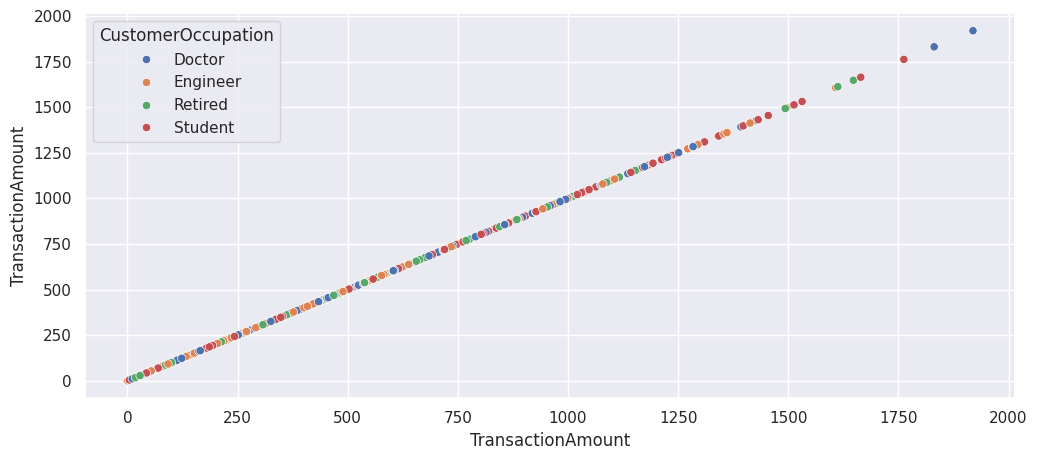

In [33]:
sns.scatterplot(data=df,x='TransactionAmount',y='TransactionAmount',hue='CustomerOccupation')

Even at extreme values, the data is still fairlt distributed between categories of CustomerOccupation. There is no space where one occupation clearly overwhelms.

### Effect of transaction type on numerical variables

In [34]:
# Slicing data into credit and debit groups
df_cred = df[df['TransactionType'] == 'Credit']
df_debi = df[df['TransactionType'] == 'Debit']
print(df_cred.shape)
print(df_debi.shape)

(568, 16)
(1944, 16)


In [35]:
df_cred.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,568.000000,568,568.000000,568.000000,568.000000,568.000000,568
mean,306.501004,2023-07-12 10:37:52.033450752,46.153169,119.394366,1.144366,5249.332799,2024-11-04 08:09:19.801056512
min,2.030000,2023-01-02 16:01:14,18.000000,10.000000,1.000000,105.010000,2024-11-04 08:06:23
25%,80.012500,2023-04-14 17:24:58.249999872,28.000000,64.000000,1.000000,1622.630000,2024-11-04 08:07:47
50%,223.360000,2023-07-17 17:32:21.500000,48.000000,109.000000,1.000000,4830.895000,2024-11-04 08:09:16
75%,425.220000,2023-10-11 23:37:56,60.000000,159.250000,1.000000,7820.770000,2024-11-04 08:10:53.249999872
max,1831.020000,2024-01-01 16:53:32,80.000000,294.000000,5.000000,14935.500000,2024-11-04 08:12:23
std,290.027618,NaN,17.730775,68.107365,0.658899,4013.817889,NaN


In [36]:
df_debi.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,1944.000000,1944,1944.000000,1944.000000,1944.000000,1944.000000,1944
mean,294.991255,2023-07-03 22:20:38.539609088,44.241770,119.716049,1.118827,5074.849805,2024-11-04 08:09:22.926440448
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,83.137500,2023-03-30 16:07:10.750000128,27.000000,63.000000,1.000000,1482.977500,2024-11-04 08:07:55
50%,205.140000,2023-07-04 18:38:15,44.000000,114.000000,1.000000,4710.125000,2024-11-04 08:09:23
75%,407.785000,2023-10-04 23:56:09.750000128,59.000000,162.000000,1.000000,7630.422500,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,292.527512,NaN,17.791443,70.513970,0.585267,3867.504758,NaN


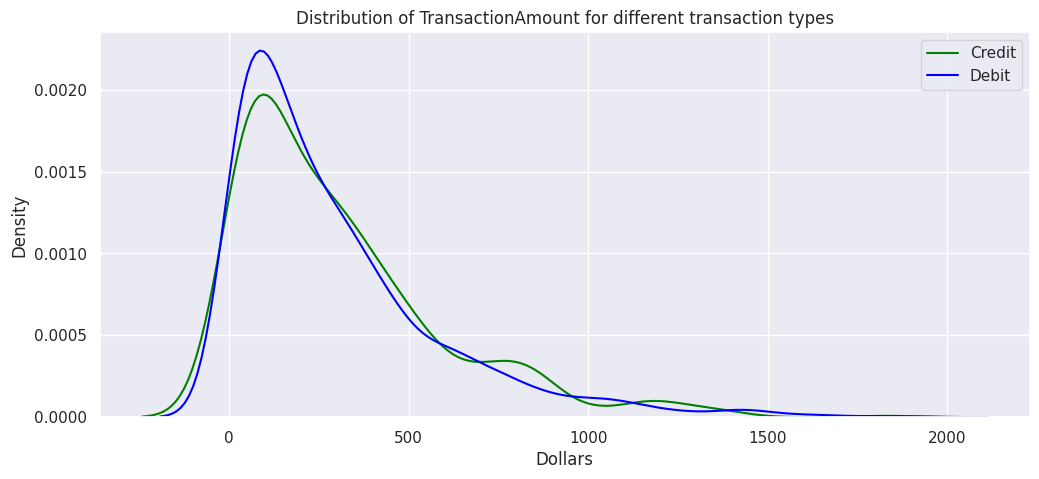

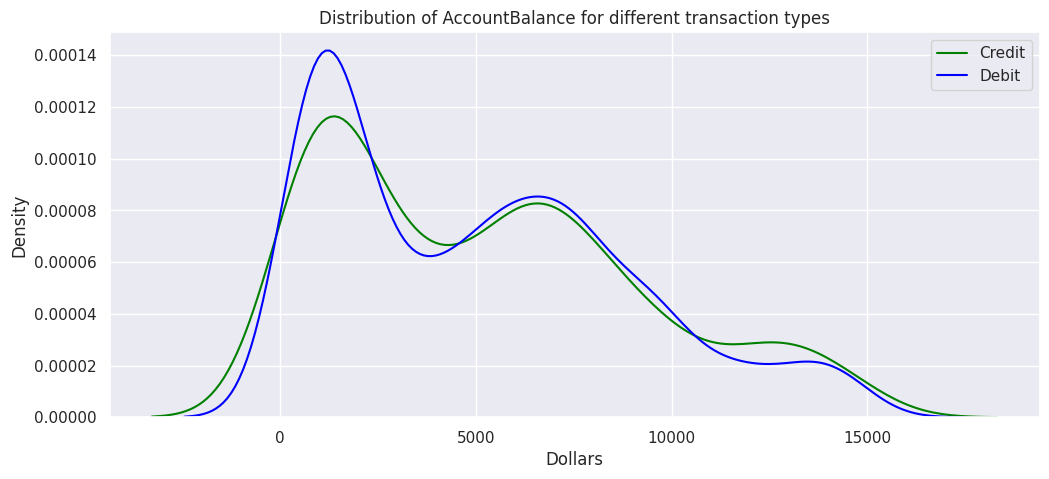

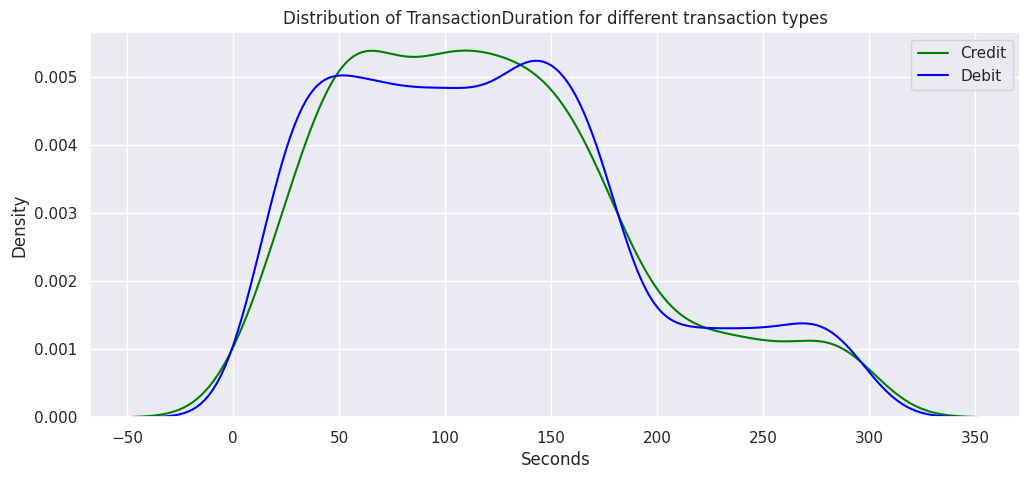

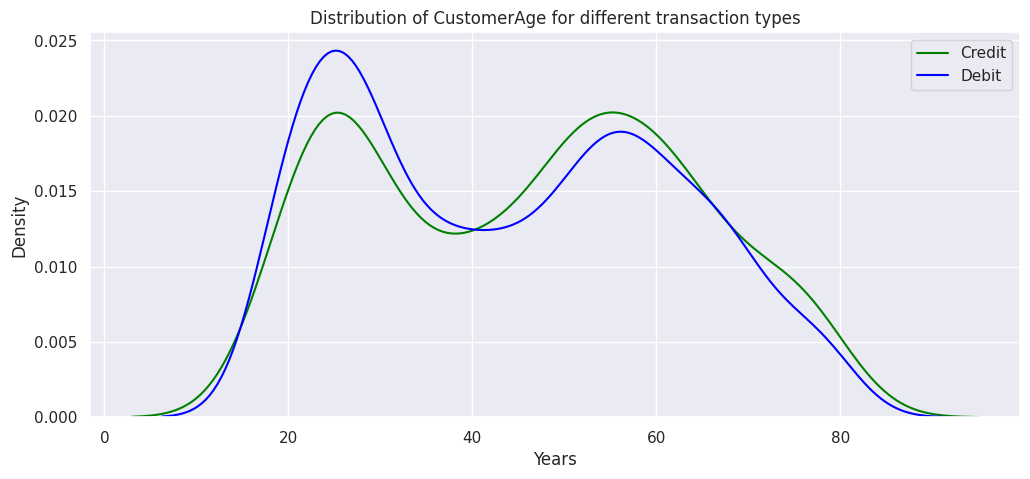

In [37]:
# Visualizations
targets = ['TransactionAmount','AccountBalance','TransactionDuration','CustomerAge']
units = {'TransactionAmount':'Dollars',
          'AccountBalance':'Dollars',
          'TransactionDuration':'Seconds',
          'CustomerAge':'Years'}

for target in targets:
  sns.kdeplot(df_cred[target],color='green',label='Credit')
  sns.kdeplot(df_debi[target],color='blue',label='Debit')
  plt.xlabel(units[target])
  plt.title('Distribution of {} for different transaction types'.format(target))
  plt.legend()
  plt.show()

Type of transaction does not seem to make much different as every other numerical variable behaves almost the same way.

### Effect of Channel on transaction amount and transaction duration

In [38]:
# Slicing data by channel
df_atm = df[df['Channel'] == 'ATM']
df_bra = df[df['Channel'] == 'Branch']
df_onl = df[df['Channel'] == 'Online']
print(df_atm.shape)
print(df_bra.shape)
print(df_onl.shape)

(833, 16)
(868, 16)
(811, 16)


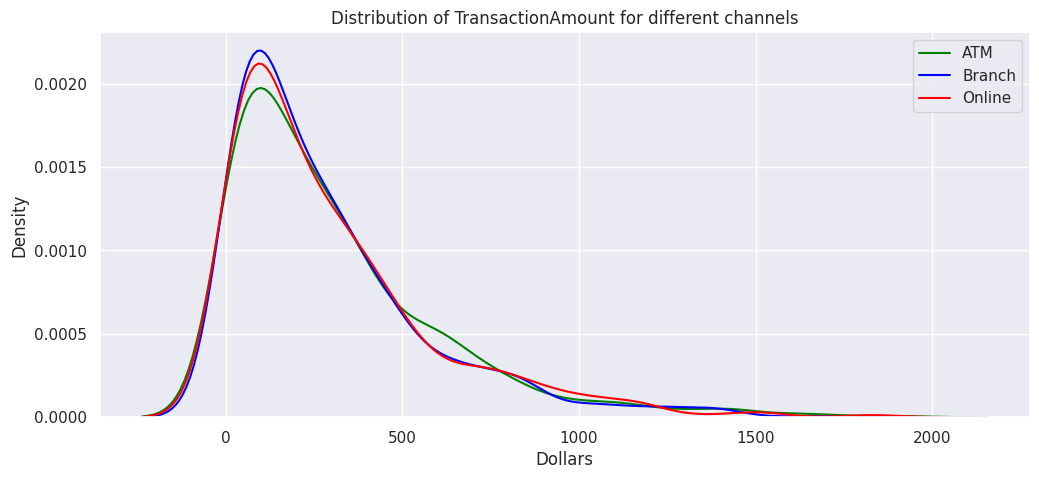

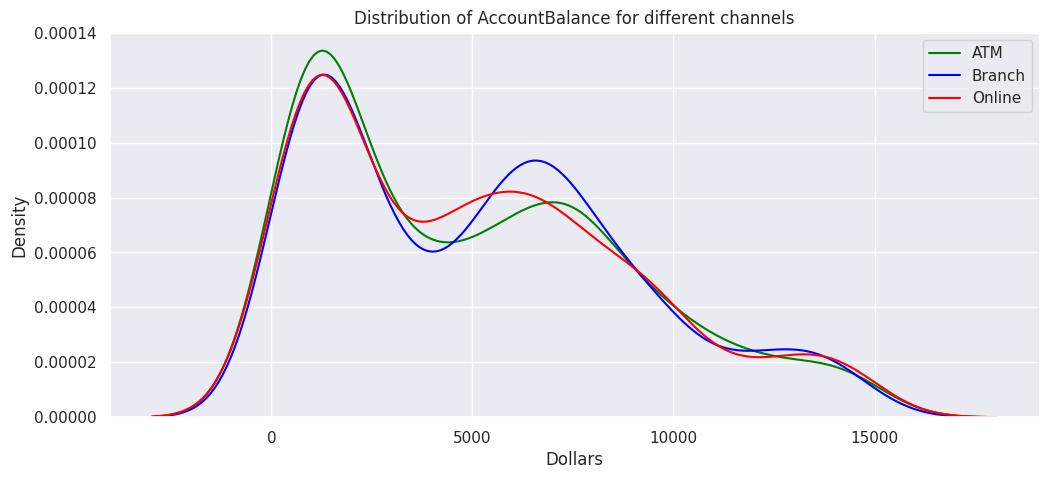

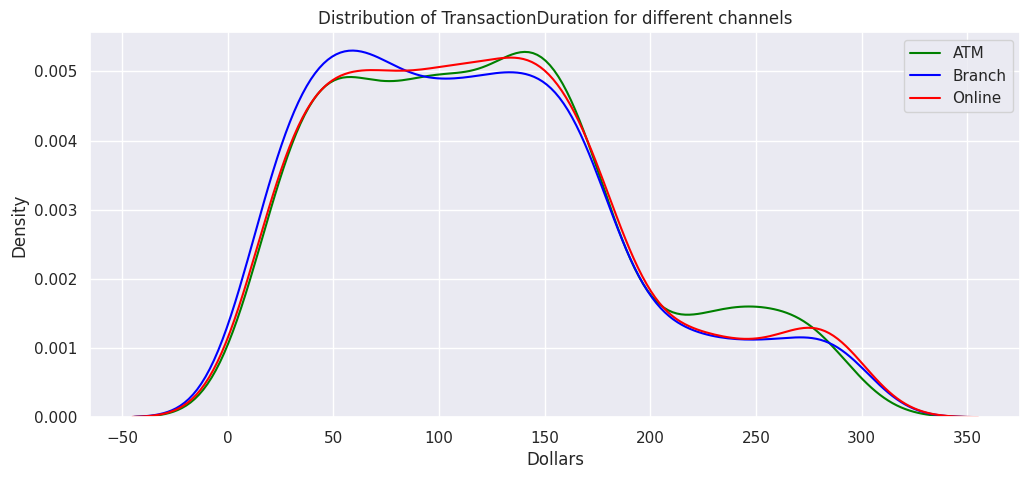

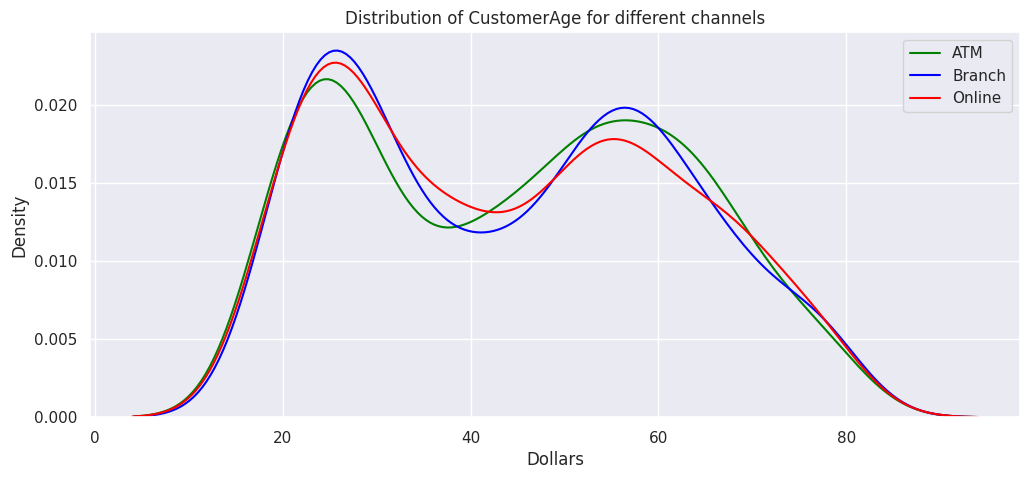

In [39]:
# Visualizations
targets = ['TransactionAmount','AccountBalance','TransactionDuration','CustomerAge']

for target in targets:
  sns.kdeplot(df_atm[target],color='green',label='ATM')
  sns.kdeplot(df_bra[target],color='blue',label='Branch')
  sns.kdeplot(df_onl[target],color='red',label='Online')
  plt.xlabel('Dollars')
  plt.title('Distribution of {} for different channels'.format(target))
  plt.legend()
  plt.show()

The same applies to choice of transaction channel.

# Machine Learning - Unsupervised - Anomalies Detection

In [40]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [41]:
# Selecting features for model
target = ['TransactionAmount','TransactionDuration']

samples = df[target]

In [42]:
# Initializing a model with 3 clusters
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

labels = pipeline.predict(samples)

In [43]:
samples

,TransactionAmount,TransactionDuration
0,14.09,81
1,376.24,141
2,126.29,56
3,184.50,25
4,13.45,198
...,...,...
2507,856.21,109
2508,251.54,177
2509,28.63,146
2510,185.97,19


In [44]:
# Re-assigning labels back to sample set
samples.insert(samples.shape[1], 'cluster', labels)

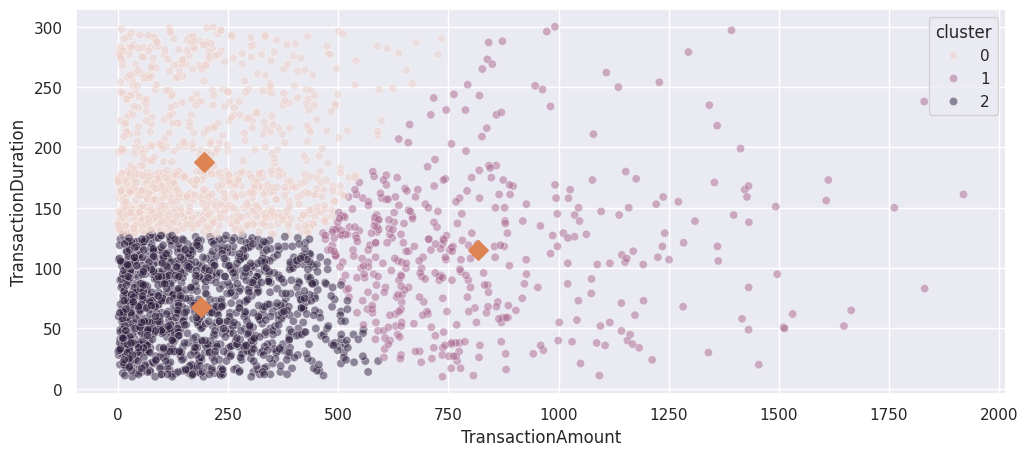

In [45]:
# Visualizing clusters
## Plotting members
sns.scatterplot(data=samples,x='TransactionAmount',y='TransactionDuration',hue='cluster', alpha=0.5)

## Extracting and inverse transform centroids' locations
model = pipeline.named_steps['kmeans']       # Extract knn model with k=3 from earlier
centroids = model.cluster_centers_
original_centroids = scaler.inverse_transform(centroids)

## Extracting x-coordinates and y-coordinates of centroids
centroids_x = original_centroids[:,0]
centroids_y = original_centroids[:,1]

## Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=100)
plt.show()

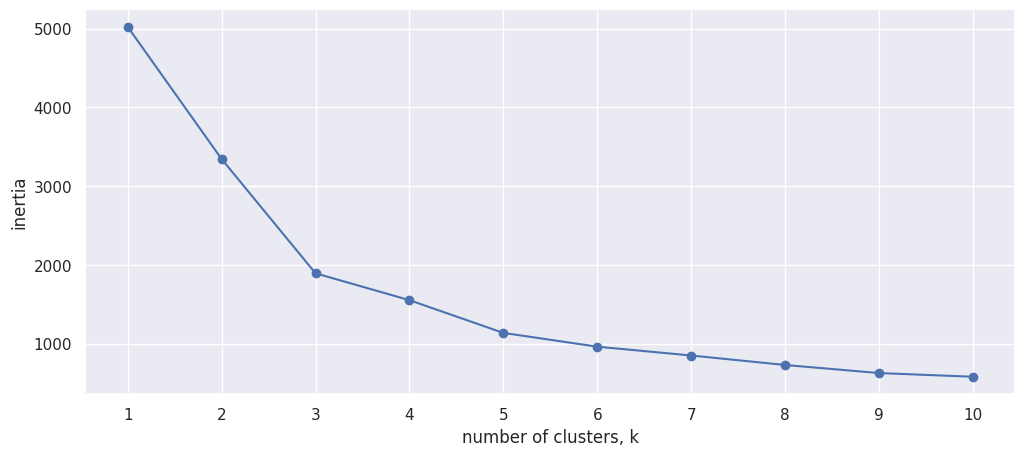

In [46]:
# Trying different number of clusters
ks = range(1, 11)
inertias = []
samples1 = df[target]
samples_prep = scaler.fit_transform(samples1)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples_prep)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Using elbow method, k=3 is indeed the best. No change is needed.

In [47]:
# Evaluate the model using within-cluster sum of squares (WCSS)
kmeans = pipeline.named_steps['kmeans']       # Extract knn model with k=3 from earlier
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

Within-Cluster Sum of Squares (WCSS): 1893.062


In [48]:
# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(samples_prep, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.817


In [49]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(samples_prep, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.422


In [50]:
samples.insert(samples.shape[1], 'scaled_TransactionAmount', samples_prep[:,0])
samples.insert(samples.shape[1], 'scaled_TransactionDuration', samples_prep[:,1])
samples.head(10)

,TransactionAmount,TransactionDuration,cluster,scaled_TransactionAmount,scaled_TransactionDuration
0,14.09,81,2,-0.971275,-0.552443
1,376.24,141,0,0.269440,0.305314
2,126.29,56,2,-0.586882,-0.909842
3,184.50,25,2,-0.387456,-1.353017
4,13.45,198,0,-0.973468,1.120184
5,92.15,172,0,-0.703844,0.748489
6,7.08,139,0,-0.995292,0.276722
7,171.42,291,0,-0.432268,2.449708
8,106.23,86,2,-0.655607,-0.480963
9,815.96,120,1,1.775907,0.005099


In [57]:
# Assigning centroid coordinates for each example based on their cluster
centroid_map = {i: centroids[i] for i in range(len(centroids))}
samples['centroid_coords'] = samples['cluster'].map(centroid_map)
samples[['centroid_x', 'centroid_y']] = pd.DataFrame(samples['centroid_coords'].tolist(), index=samples.index)
samples = samples.drop('centroid_coords', axis=1)
samples.head(10)

,TransactionAmount,TransactionDuration,cluster,scaled_TransactionAmount,scaled_TransactionDuration,centroid_x,centroid_y,dist_to_centroid,anomalies_warn
0,14.09,81,2,-0.971275,-0.552443,-0.372341,-0.737169,1.340463,False
1,376.24,141,0,0.269440,0.305314,-0.350143,0.975100,1.471404,False
2,126.29,56,2,-0.586882,-0.909842,-0.372341,-0.737169,1.322504,False
3,184.50,25,2,-0.387456,-1.353017,-0.372341,-0.737169,1.281454,False
4,13.45,198,0,-0.973468,1.120184,-0.350143,0.975100,1.324752,False
5,92.15,172,0,-0.703844,0.748489,-0.350143,0.975100,1.279537,False
6,7.08,139,0,-0.995292,0.276722,-0.350143,0.975100,1.120577,False
7,171.42,291,0,-0.432268,2.449708,-0.350143,0.975100,1.929702,True
8,106.23,86,2,-0.655607,-0.480963,-0.372341,-0.737169,1.419881,False
9,815.96,120,1,1.775907,0.005099,1.780622,-0.066482,1.430945,False


In [52]:
# Calculating distance using Euclidian distance formula, manually
samples['dist_to_centroid'] = np.sqrt(2**(samples['scaled_TransactionAmount']-samples['centroid_x'])+2**(samples['scaled_TransactionDuration']-samples['centroid_y']))
samples.head(10)

,TransactionAmount,TransactionDuration,cluster,scaled_TransactionAmount,scaled_TransactionDuration,centroid_x,centroid_y,dist_to_centroid
0,14.09,81,2,-0.971275,-0.552443,-0.372341,-0.737169,1.340463
1,376.24,141,0,0.269440,0.305314,-0.350143,0.975100,1.471404
2,126.29,56,2,-0.586882,-0.909842,-0.372341,-0.737169,1.322504
3,184.50,25,2,-0.387456,-1.353017,-0.372341,-0.737169,1.281454
4,13.45,198,0,-0.973468,1.120184,-0.350143,0.975100,1.324752
5,92.15,172,0,-0.703844,0.748489,-0.350143,0.975100,1.279537
6,7.08,139,0,-0.995292,0.276722,-0.350143,0.975100,1.120577
7,171.42,291,0,-0.432268,2.449708,-0.350143,0.975100,1.929702
8,106.23,86,2,-0.655607,-0.480963,-0.372341,-0.737169,1.419881
9,815.96,120,1,1.775907,0.005099,1.780622,-0.066482,1.430945


In [53]:
# Calling out anomalies
dist_95_thresh = np.quantile(samples['dist_to_centroid'],0.95)  # Defining threshold for anomalies detection

samples['anomalies_warn'] = samples['dist_to_centroid'] >= dist_95_thresh # If distance is above 95th percentile, warn as anomaly
samples.head(10)

,TransactionAmount,TransactionDuration,cluster,scaled_TransactionAmount,scaled_TransactionDuration,centroid_x,centroid_y,dist_to_centroid,anomalies_warn
0,14.09,81,2,-0.971275,-0.552443,-0.372341,-0.737169,1.340463,False
1,376.24,141,0,0.269440,0.305314,-0.350143,0.975100,1.471404,False
2,126.29,56,2,-0.586882,-0.909842,-0.372341,-0.737169,1.322504,False
3,184.50,25,2,-0.387456,-1.353017,-0.372341,-0.737169,1.281454,False
4,13.45,198,0,-0.973468,1.120184,-0.350143,0.975100,1.324752,False
5,92.15,172,0,-0.703844,0.748489,-0.350143,0.975100,1.279537,False
6,7.08,139,0,-0.995292,0.276722,-0.350143,0.975100,1.120577,False
7,171.42,291,0,-0.432268,2.449708,-0.350143,0.975100,1.929702,True
8,106.23,86,2,-0.655607,-0.480963,-0.372341,-0.737169,1.419881,False
9,815.96,120,1,1.775907,0.005099,1.780622,-0.066482,1.430945,False


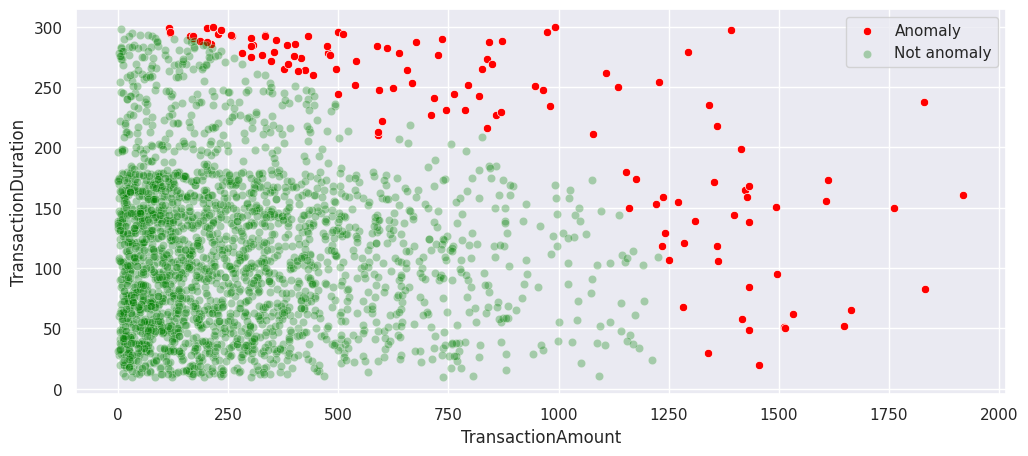

In [54]:
## Visualize anomalies
anomalies = samples[samples['anomalies_warn']==True]
not_anomalies = samples[samples['anomalies_warn']==False]
sns.scatterplot(data=anomalies,x='TransactionAmount',y='TransactionDuration',c='red',label='Anomaly')
sns.scatterplot(data=not_anomalies,x='TransactionAmount',y='TransactionDuration',c='green', alpha=0.3,label='Not anomaly')
plt.show()

In [55]:
# How many anomalies have been detected?
print('A total of {} anomalies have been detected from the dataset'.format(len(anomalies)))

A total of 126 anomalies have been detected from the dataset
